In [14]:
import re
import matplotlib.pyplot as plt
import mpld3
import numpy as np
import random
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rohanpatil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# To remove urls from data
def remove_urls(text):
    res = re.sub(r'https?:?\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    return res

# To keep only letters and spaces
def keep_only_alpha(text):
    res = re.sub(r'[^a-zA-Z]', ' ', text, flags=re.MULTILINE)
    return res

# To remove tags
def remove_tags(text):
    res = re.sub(r'[@#][\S]*', ' ', text, flags=re.MULTILINE)
    return res

# For removing emojis
def remove_emoji(text):
    res = re.sub(r'[:;][a-zA-Z()]', ' ', text, flags=re.MULTILINE)
    return res

# Convert shorthands
def convert_shorthand(text):
    text = re.sub(r"\s[Cc]an't\s", 'can not ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Cc]ant\s", 'can not ', text, flags=re.MULTILINE)
    text = re.sub(r"shouldn't\s", 'should not ', text, flags=re.MULTILINE)
    text = re.sub(r"shouldnt\s", 'should not ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Mm]a'm\s", ' madam ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Mm]aam\s", ' madam ', text, flags=re.MULTILINE)
    text = re.sub(r"wid\s", 'with ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[uU]\s", ' you ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Pp]ak\s", ' pakistan ', text, flags=re.MULTILINE)
    text = re.sub(r"\sur\s", ' your ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[iI]m\s", ' i am ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[iI]'m\s", ' i am ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[lL]et's\s", ' let us ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[lL]ets\s", ' let us ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[hH]e's\s", ' he is ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Ss]he's\s", ' she is ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[iI]t's\s", ' it is ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[tT]hat's\s", ' that is ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[tT]hey're\s", ' they are ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Yy]ou're\s", ' you are ', text, flags=re.MULTILINE)
    text = re.sub(r"\s[Ww]e're\s", ' we are ', text, flags=re.MULTILINE)
    text = re.sub(r"'ll\s", ' will ', text, flags=re.MULTILINE)
    text = re.sub(r"\sem\s", ' them ', text, flags=re.MULTILINE)
    return text


# Convert some hindi words that are same but spellings in english vary
def convert_hindi_eqi(text):
    text = re.sub(r"\shoon\s", ' hu ', text, flags=re.MULTILINE)
    text = re.sub(r"\shuwe\s", ' hue ', text, flags=re.MULTILINE)
    return text


# Remove double quotes from file
def remove_dquoute(text):
    res = re.sub(r'"', '', text, flags=re.MULTILINE)
    return res

# Remove more than one spaces
def remove_spaces(text):
    res = re.sub(r'\s\s\s*', ' ', text, flags=re.MULTILINE)
    return res

# Remove hagning letter which don't hold meaning
def remove_hanging(text):
    res = re.sub(r'\s[^iI]\s', ' ', text)
    return res

# Applies the above definitions to clean text
def clean_text(text):
    text = remove_urls(text)
    text = remove_urls(text)
    text = remove_dquoute(text)
    text = remove_dquoute(text)
    text = remove_emoji(text)
    text = remove_emoji(text)
    text = remove_tags(text)
    text = remove_tags(text)
    text = convert_hindi_eqi(text)
    text = convert_hindi_eqi(text)
    text = convert_shorthand(text)
    text = convert_shorthand(text)
    text = keep_only_alpha(text)
    text = keep_only_alpha(text)
    text = remove_hanging(text)
    text = remove_hanging(text)
    text = text.lower()
    text = remove_spaces(text)
    text = remove_spaces(text)

    return text

# Tokenize the processed text
def tokenize(text):
    tokens = text.split()
    return tokens

# Accquire types in a reverse sorted list
def get_types(tokens, types):
    for i in tokens:
        if i not in types:
            types[i] = 1
        else:
            types[i]+=1
    
    types = list(zip(types.values(), types.keys()))
    types = sorted(types, reverse=True)

# Load the CSV file

In [36]:
file = open('tweets-dataset.csv','r', encoding='utf-8')

# To remove header
file.readline()

text = file.read()
file.close()

# Generate tokens and types after cleaning

In [37]:
tprocessed = clean_text(text)
tokens = tokenize(tprocessed)

types = {}
get_types(tokens, types)

# Printing stats
print('Number of Tokens: \t', len(tokens))
print('Number of Types: \t', len(types))
print('TTR: \t', len(types)/len(tokens))

Number of Tokens: 	 285691
Number of Types: 	 30780
TTR: 	 0.10773878071062791


# Zipf's Laws

In [38]:
types_list = list(zip(types.values(),types.keys()))
types_list.sort(reverse=True)
len_types = len(types_list)

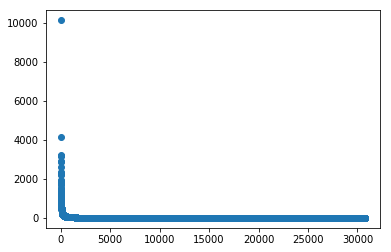

In [51]:
plt.scatter(np.arange(len_types),[j[0] for j in types_list])

We can see from the above plot of frequency vs. rank that frequency is inversely proportional to rank. Hence, Zipf's Law is verified

## Meaning

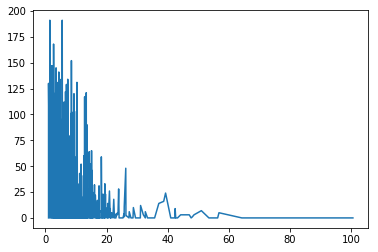

In [49]:
pairs = []
for word in types.keys():
    freq = (types[word]**0.5)
    synonyms = 0
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms+=1
    pairs.append((freq,synonyms))

pairs.sort()

plt.plot([j[0] for j in pairs],[j[1] for j in pairs])

Here we use the nltk wordnet to find the meanings but as we can see here there's a problem. This is likely because hindi words written in english cannot be made out by nltk

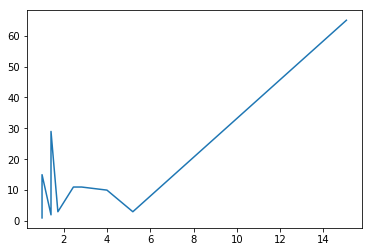

In [47]:
words = ['accurate','simplicity','advocacy','dialogue','good','auspicious',
          'classy','competition','fantasy','budget','possibility','rejected','epidemic']
for word in words:
    freq = (types[word]**0.5)
    synonyms = 0
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms+=1
    pairs.append((freq,synonyms))

pairs.sort()

plt.plot([j[0] for j in pairs],[j[1] for j in pairs])

Here we have chosen few words for which nltk can find the synonyms. We can see here that it is a straight line thus verifying Zipf's law.

## Length

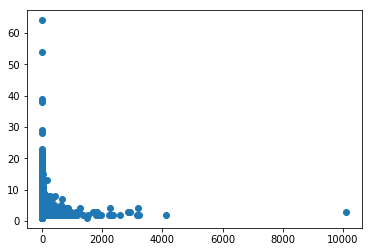

In [8]:
plt.scatter(types.values(), [len(j) for j in types.keys()])

This is the length vs. frequency graph. As expected, it is a hyperbola and hence Zipf's law is verified

# Heap's Law

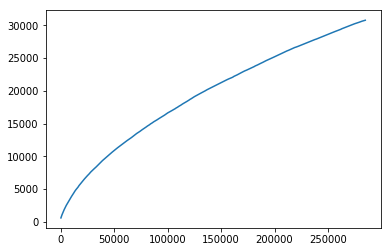

In [14]:
tokens_len = len(tokens)

step = 1000

types = {}

num_tokens = np.arange(0, tokens_len, step)
num_types = []

for i in num_tokens:
    get_types(tokens[i:i+step], types)
    num_types.append(len(types))

num_types = np.array(num_types)
    
plt.plot(num_tokens, num_types)

## Estimating the K and beta of Heap's law

Estimated K: 17
Estimated b: 0.60


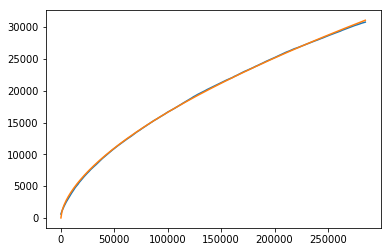

In [15]:
distance = []

K_est = 0
b_est = 0
dis_est = tokens_len

for K in np.arange(9, 110):
    for b in np.arange(0.3, 0.7, 0.001):
        dis = np.mean(abs(num_types - K*(num_tokens**b)))
        if dis < dis_est:
            dis_est = dis
            K_est = K
            b_est = b

print('Estimated K:',K_est)
print('Estimated b:', '%.2F' % b_est)

plt.plot(num_tokens, num_types)
plt.plot(num_tokens, K_est*(num_tokens**b_est))